In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv('Salary_data.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
X = data['YearsExperience']
y = data['Salary']

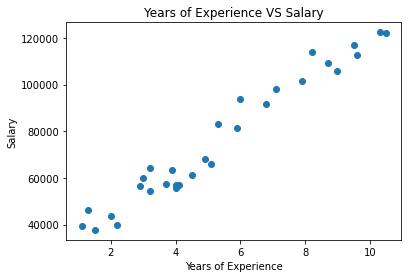

In [30]:
plt.title('Years of Experience VS Salary')
plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

**Defining the OLS Model**

In [45]:
class OLS:
    def __init__(self):
        self.bias = None
        self.weight = None
        
    def fit(self, X, y):
        # calculating the mean of independent and dependent variable
        x_mean = X.mean()
        y_mean = y.mean()
        
        # initialising the value of numerator and denominator for the calculation of weight
        num = 0
        den = 0
        
        for i in range(len(X)):
            num += (X[i] - x_mean) * (y[i] - y_mean)
            den += (X[i] - x_mean) ** 2
            
        # calculating weight and bias
        self.weight = num / den
        self.bias = y_mean - (self.weight * x_mean)
        
    def predict(self, X):
        return self.bias + (self.weight * X)

**Splitting the dataset into training and testing data.**

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Fitting the model on training set and predicting the values for testing set.**

In [47]:
model = OLS()

model.fit(np.array(X_train), np.array(y_train))

y_pred = model.predict(X_test)

print(f'Weight: {model.weight}')
print(f'Bias: {model.bias}')

Weight: 9379.710491946016
Bias: 26986.691316737248


**Plotting the line of regression.**

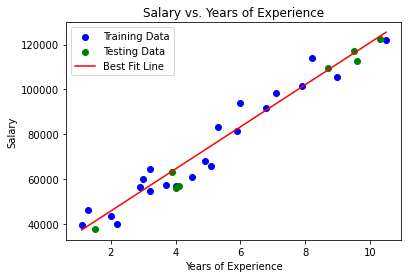

In [63]:
# plot the training and testing datasets along with the best fit line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(data['YearsExperience'], model.predict(data['YearsExperience']), 
         color='red', label='Best Fit Line')
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

#### MSE

In [56]:
mse = np.mean((y_test - y_pred) ** 2)

In [57]:
mse

22407940.143340684

#### R2

In [58]:
ssr = np.sum((y_pred - np.mean(y_test)) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = ssr / sst

In [59]:
r2

0.8939969361648622